#**1. Library**

In [ ]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
pd.options.display.float_format = '{:.5f}'.format

#**2. Stocks Dataset**

##**A. Stock Market Price**

In [ ]:
ticker = [
    "ACES.JK", "ADMR.JK", "ADRO.JK", "AKRA.JK", "AMMN.JK", "AMRT.JK", "ANTM.JK", "ARTO.JK", "ASII.JK",
    "AUTO.JK", "AVIA.JK", "BBCA.JK", "BBNI.JK", "BBRI.JK", "BBTN.JK", "BFIN.JK", "BMRI.JK", "BMTR.JK",
    "BNGA.JK", "BRIS.JK", "BRMS.JK", "BRPT.JK", "BSDE.JK", "BTPS.JK", "BUKA.JK", "CMRY.JK", "CPIN.JK",
    "CTRA.JK", "ELSA.JK", "EMTK.JK", "ENRG.JK", "ERAA.JK", "ESSA.JK", "EXCL.JK", "GGRM.JK", "GJTL.JK",
    "GOTO.JK", "HEAL.JK", "HRUM.JK", "ICBP.JK", "INCO.JK", "INDF.JK", "INDY.JK", "INKP.JK", "INTP.JK",
    "ISAT.JK", "ITMG.JK", "JPFA.JK", "JSMR.JK", "KLBF.JK", "MAPA.JK", "MAPI.JK", "MBMA.JK", "MDKA.JK",
    "MEDC.JK", "MIDI.JK", "MIKA.JK", "MNCN.JK", "MPMX.JK", "MTEL.JK", "MYOR.JK", "NCKL.JK", "NISP.JK",
    "PANI.JK", "PGAS.JK", "PGEO.JK", "PNLF.JK", "PTBA.JK", "PWON.JK", "SCMA.JK", "SIDO.JK", "SMDR.JK",
    "SMGR.JK", "SMRA.JK", "SRTG.JK", "TKIM.JK", "TLKM.JK", "TOWR.JK", "UNTR.JK", "UNVR.JK"
]

start_date = '2022-12-01'
end_date = '2024-12-01'

stock = yf.download(ticker, start=start_date, end=end_date)
stock.head()

[*********************100%***********************]  80 of 80 completed


Price      Adj Close                                                      \
Ticker       ACES.JK    ADMR.JK    ADRO.JK    AKRA.JK AMMN.JK    AMRT.JK   
Date                                                                       
2022-12-01 457.73691 1700.00000 1771.65173 1235.55847     NaN 2885.16333   
2022-12-02 450.41315 1690.00000 1748.93860 1244.13855     NaN 2894.97681   
2022-12-05 437.59650 1685.00000 1717.13953 1201.23718     NaN 2865.53638   
2022-12-06 421.11795 1645.00000 1730.76770 1166.91626     NaN 2855.72290   
2022-12-07 404.63943 1650.00000 1739.85303 1179.78650     NaN 2826.28247   

Price                                                   ...    Volume  \
Ticker        ANTM.JK    ARTO.JK    ASII.JK    AUTO.JK  ...   SIDO.JK   
Date                                                    ...             
2022-12-01 1807.69153 4510.00000 5006.50049 1352.93481  ...  19147500   
2022-12-02 1807.69153 4200.00000 4965.96240 1344.34473  ...  12752400   
2022-12-05 1825.41406 3950.00000 4884.88525 1279.91919  ...  19470600   
2022-12-06 1741.23242 4050.00000 4763.27051 1271.32910  ...  23581100   
2022-12-07 1701.35681 3980.00000 4641.65479 1258.44397  ...   9496500   

Price                                                                   \
Ticker       SMDR.JK   SMGR.JK   SMRA.JK   SRTG.JK  TKIM.JK    TLKM.JK   
Date                                                                     
2022-12-01  22492000  12715779  61289000  25162000  2412600  230066600   
2022-12-02  13694500   4973498  20500300  16311500  1643300  113336600   
2022-12-05  11149500   4965476  14919200  14177500  1003800  148751200   
2022-12-06  14557500  12942508  16152100  19011000  3226700  416468700   
2022-12-07  34298500  15743480  30969600  10619100  2148400  278572200   

Price                                      
Ticker        TOWR.JK   UNTR.JK   UNVR.JK  
Date                                       
2022-12-01   48450900   5655100  16755100  
2022-12-02   41516000   6103900   6918500  
2022-12-05   57171300   5464300   9788500  
2022-12-06   36492800   7208000  12811800  
2022-12-07  111397700  10339900  19509900  

[5 rows x 480 columns]

<Figure size 2000x3000 with 0 Axes>

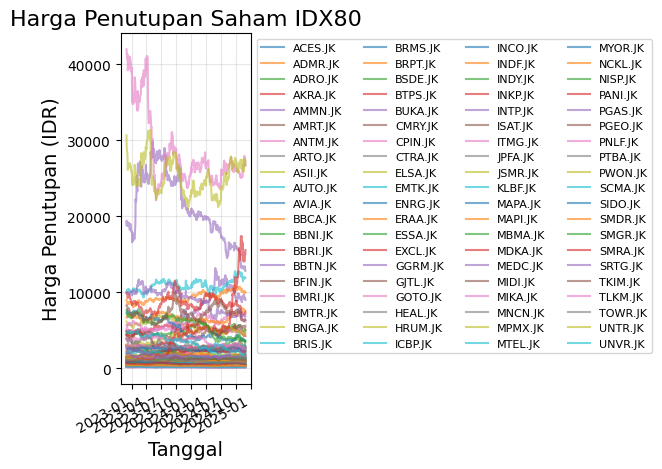

In [ ]:
# Pilih harga penutupan
close_prices = stock['Close']

# Plot harga penutupan semua ticker
plt.figure(figsize=(20, 30))
close_prices.plot(alpha=0.6, legend=False)

plt.title("Harga Penutupan Saham IDX80", fontsize=16)
plt.xlabel("Tanggal", fontsize=14)
plt.ylabel("Harga Penutupan (IDR)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(close_prices.columns, loc='upper left', fontsize=8, ncol=4, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


##**B. Stocks Return Dataset**

In [ ]:
close_df = stock['Close']
close_df.head()

Ticker,ACES.JK,ADMR.JK,ADRO.JK,AKRA.JK,AMMN.JK,AMRT.JK,ANTM.JK,ARTO.JK,ASII.JK,AUTO.JK,...,SIDO.JK,SMDR.JK,SMGR.JK,SMRA.JK,SRTG.JK,TKIM.JK,TLKM.JK,TOWR.JK,UNTR.JK,UNVR.JK
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-01,500.00000,1700.00000,3900.00000,1440.00000,NaN,2940.00000,2040.00000,4510.00000,6175.00000,1575.00000,...,790.00000,448.00000,7678.63623,650.00000,2750.00000,8275.00000,3960.00000,1150.00000,30675.00000,4710.00000
2022-12-02,492.00000,1690.00000,3850.00000,1450.00000,NaN,2950.00000,2040.00000,4200.00000,6125.00000,1565.00000,...,785.00000,448.00000,7653.70557,635.00000,2750.00000,8300.00000,4000.00000,1155.00000,29225.00000,4710.00000
2022-12-05,478.00000,1685.00000,3780.00000,1400.00000,NaN,2920.00000,2060.00000,3950.00000,6025.00000,1490.00000,...,770.00000,450.00000,7678.63623,640.00000,2730.00000,8200.00000,3840.00000,1145.00000,28500.00000,4740.00000
2022-12-06,460.00000,1645.00000,3810.00000,1360.00000,NaN,2910.00000,1965.00000,4050.00000,5875.00000,1480.00000,...,750.00000,446.00000,7155.09277,610.00000,2610.00000,7950.00000,3600.00000,1115.00000,28100.00000,4740.00000
2022-12-07,442.00000,1650.00000,3830.00000,1375.00000,NaN,2880.00000,1920.00000,3980.00000,5725.00000,1465.00000,...,755.00000,436.00000,6980.57861,615.00000,2650.00000,7950.00000,3680.00000,1095.00000,28050.00000,4700.00000


In [ ]:
def stock_return_calculation(df):
  returns = df.pct_change().dropna()
  return returns

return_df = stock_return_calculation(close_df)
return_df.head()

Ticker,ACES.JK,ADMR.JK,ADRO.JK,AKRA.JK,AMMN.JK,AMRT.JK,ANTM.JK,ARTO.JK,ASII.JK,AUTO.JK,...,SIDO.JK,SMDR.JK,SMGR.JK,SMRA.JK,SRTG.JK,TKIM.JK,TLKM.JK,TOWR.JK,UNTR.JK,UNVR.JK
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-10,-0.01389,0.02899,0.01681,0.00000,-0.00285,0.01119,0.00253,-0.02477,-0.00733,-0.00772,...,0.00000,0.00000,0.00000,0.02941,0.00285,0.00000,-0.00253,0.00455,0.01474,0.00236
2023-07-11,0.00000,-0.00939,0.00413,0.01379,0.00000,0.02214,0.01010,0.00317,0.00369,0.05058,...,0.02055,-0.06599,0.01946,-0.00714,-0.01136,0.03891,0.00759,-0.00905,0.01556,0.00000
2023-07-12,0.02113,-0.00474,-0.02469,-0.01361,0.00857,0.00361,-0.00500,0.00000,-0.00368,-0.02222,...,0.00000,-0.00543,-0.00763,0.00000,-0.01437,0.01873,0.00000,0.01370,-0.01941,-0.00941
2023-07-13,-0.01379,-0.04762,-0.02110,0.00345,-0.00283,0.00000,0.00000,0.01582,0.00369,0.01515,...,-0.02685,0.00546,0.03462,-0.02158,-0.02332,-0.02941,-0.01508,-0.02703,0.00625,0.00950
2023-07-14,0.00699,0.01000,0.01724,-0.02749,0.01136,-0.00360,0.00503,-0.00312,-0.00735,-0.02239,...,-0.00690,0.00000,0.02230,0.04412,0.00896,0.01515,0.00255,-0.00463,0.00000,0.00000


<Figure size 1400x800 with 0 Axes>

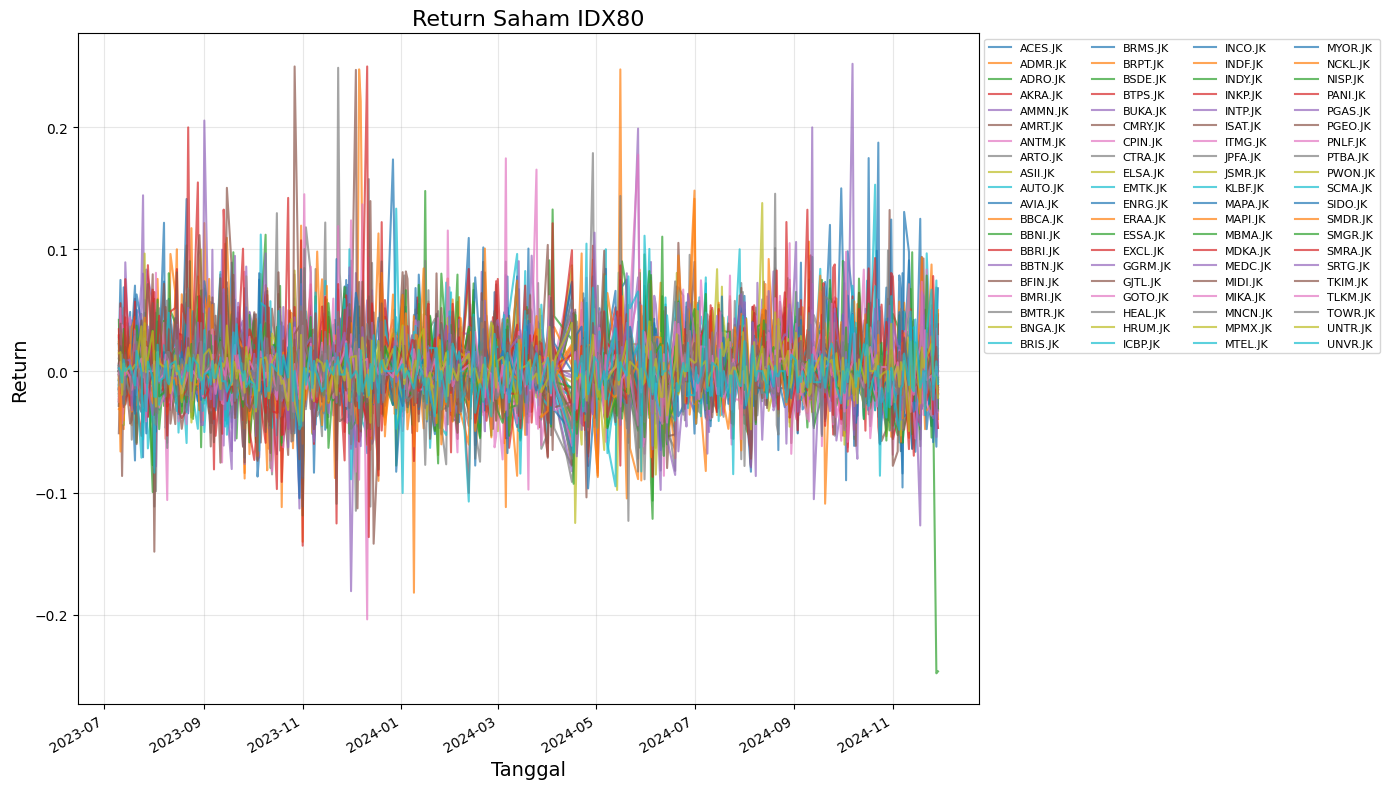

In [ ]:
plt.figure(figsize=(14, 8))
return_df.plot(figsize=(14, 8), alpha=0.7, legend=False)

plt.title("Return Saham IDX80", fontsize=16)
plt.xlabel("Tanggal", fontsize=14)
plt.ylabel("Return", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(return_df.columns, loc='upper left', fontsize=8, ncol=4, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


##**C. Uji Normalitas Return Dataset**

In [ ]:
!pip install seaborn

In [ ]:
from scipy import stats
import seaborn as sns


In [ ]:
# Function to classify normal and non-normal data based on Kolmogorov-Smirnov Test
def classify_normality(dataframe):
    results = {
        "Normal": [],
        "Tidak Normal": []
    }

    for column in dataframe.columns:
        data = dataframe[column].dropna()
        if len(data) > 0:  # Ensure there's enough data for the test
            ks_stat, ks_p_value = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
            if ks_p_value > 0.05:
                results["Normal"].append(column)
            else:
                results["Tidak Normal"].append(column)

    return results

# Classify stocks based on normality
data_classification = classify_normality(return_df)

# Display results
print("Normal:", data_classification["Normal"])
print("Tidak Normal:", data_classification["Tidak Normal"])

Normal: ['ADMR.JK', 'BBRI.JK', 'CTRA.JK', 'INKP.JK', 'ISAT.JK', 'ITMG.JK', 'MIKA.JK', 'TKIM.JK', 'UNTR.JK']
Tidak Normal: ['ACES.JK', 'ADRO.JK', 'AKRA.JK', 'AMMN.JK', 'AMRT.JK', 'ANTM.JK', 'ARTO.JK', 'ASII.JK', 'AUTO.JK', 'AVIA.JK', 'BBCA.JK', 'BBNI.JK', 'BBTN.JK', 'BFIN.JK', 'BMRI.JK', 'BMTR.JK', 'BNGA.JK', 'BRIS.JK', 'BRMS.JK', 'BRPT.JK', 'BSDE.JK', 'BTPS.JK', 'BUKA.JK', 'CMRY.JK', 'CPIN.JK', 'ELSA.JK', 'EMTK.JK', 'ENRG.JK', 'ERAA.JK', 'ESSA.JK', 'EXCL.JK', 'GGRM.JK', 'GJTL.JK', 'GOTO.JK', 'HEAL.JK', 'HRUM.JK', 'ICBP.JK', 'INCO.JK', 'INDF.JK', 'INDY.JK', 'INTP.JK', 'JPFA.JK', 'JSMR.JK', 'KLBF.JK', 'MAPA.JK', 'MAPI.JK', 'MBMA.JK', 'MDKA.JK', 'MEDC.JK', 'MIDI.JK', 'MNCN.JK', 'MPMX.JK', 'MTEL.JK', 'MYOR.JK', 'NCKL.JK', 'NISP.JK', 'PANI.JK', 'PGAS.JK', 'PGEO.JK', 'PNLF.JK', 'PTBA.JK', 'PWON.JK', 'SCMA.JK', 'SIDO.JK', 'SMDR.JK', 'SMGR.JK', 'SMRA.JK', 'SRTG.JK', 'TLKM.JK', 'TOWR.JK', 'UNVR.JK']


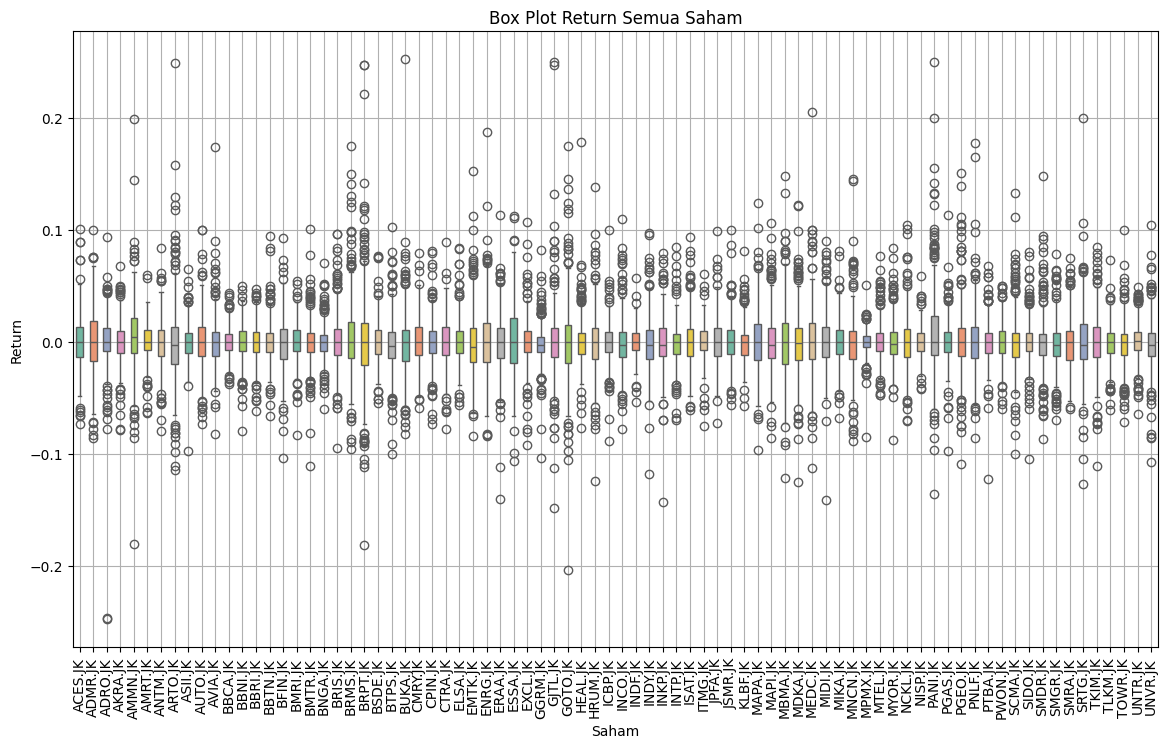

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=return_df, width=0.5, palette='Set2')
plt.title('Box Plot Return Semua Saham')
plt.xlabel('Saham')
plt.ylabel('Return')
plt.xticks(rotation=90)  # Menambahkan rotas
plt.grid(True)
plt.show()

##**D. Stock Sharpe Ratio**

In [ ]:
def stock_sharpe_ratio(return_data, rf = 0.06):
  daily_rf = ((1+rf)**(1/239))-1

  mean_return = return_data.mean()
  std_return = return_data.std()
  SR = (mean_return - daily_rf) / std_return

  table_data = {
      'mean_return' : mean_return,
      'standard_deviation' : std_return,
      'sharpe_ratio' : SR
  }

  table = pd.DataFrame(table_data)
  return table

In [ ]:
tickers = return_df.columns.values.tolist()
sharpe_ratio = stock_sharpe_ratio(return_df[tickers])
sharpe_ratio = sharpe_ratio.reset_index().rename(columns = {'Ticker' : 'ticker'})
sharpe_ratio

,ticker,mean_return,standard_deviation,sharpe_ratio
0,ACES.JK,0.00048,0.02390,0.00993
1,ADMR.JK,0.00093,0.02929,0.02327
2,ADRO.JK,0.00003,0.02789,-0.00782
3,AKRA.JK,-0.00031,0.01862,-0.02990
4,AMMN.JK,0.00535,0.03171,0.16092
...,...,...,...,...
75,TKIM.JK,0.00028,0.02490,0.00126
76,TLKM.JK,-0.00099,0.01623,-0.07602
77,TOWR.JK,-0.00112,0.01982,-0.06878
78,UNTR.JK,0.00049,0.01653,0.01496


##**E. Clustering Datasets**

In [ ]:
from sklearn.preprocessing import StandardScaler

clustering_df = sharpe_ratio[['ticker', 'mean_return', 'standard_deviation']].set_index('ticker')
clustering_df

,mean_return,standard_deviation
ticker,,
ACES.JK,0.00048,0.02390
ADMR.JK,0.00093,0.02929
ADRO.JK,0.00003,0.02789
AKRA.JK,-0.00031,0.01862
AMMN.JK,0.00535,0.03171
...,...,...
TKIM.JK,0.00028,0.02490
TLKM.JK,-0.00099,0.01623
TOWR.JK,-0.00112,0.01982


#**3. Stocks Clustering**

Jumlah komponen: 2, Silhouette Score: 0.5082
Jumlah komponen: 3, Silhouette Score: 0.5697
Jumlah komponen: 4, Silhouette Score: 0.5563
Jumlah komponen: 5, Silhouette Score: 0.5686
Jumlah komponen: 6, Silhouette Score: 0.5319
Jumlah komponen: 7, Silhouette Score: 0.5372
Jumlah komponen: 8, Silhouette Score: 0.5149


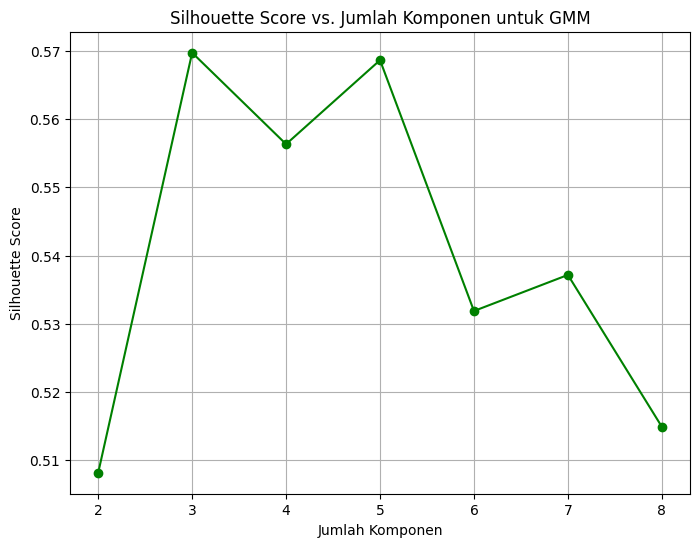

Hasil GMM Terbaik: {'best_num_components': 3, 'best_silhouette_score': 0.5697325045887522, 'best_gmm': GaussianMixture(n_components=3, random_state=123)}


In [ ]:
# Menstandarkan data rasio Sharpe untuk klasterisasi
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sharpe_ratio[['sharpe_ratio']])

# Fungsi untuk klasterisasi GMM
def gmm_clustering(data, n_components_range=[2, 3, 4, 5, 6, 7, 8]):
    best_num_components = 0
    best_silhouette_score = -1
    best_gmm = None
    silhouette_scores = []  # List untuk menyimpan silhouette scores

    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=123)
        gmm.fit(data)
        labels = gmm.predict(data)

        # Menghitung silhouette score
        try:
            score = silhouette_score(data, labels)
            silhouette_scores.append(score)  # Menyimpan silhouette score
            print(f"Jumlah komponen: {n_components}, Silhouette Score: {score:.4f}")

            if score > best_silhouette_score:
                best_silhouette_score = score
                best_num_components = n_components
                best_gmm = gmm
        except ValueError:
            print(f"Jumlah komponen: {n_components} menghasilkan error.")

    # Menampilkan grafik silhouette
    plt.figure(figsize=(8, 6))
    plt.plot(n_components_range, silhouette_scores, marker='o', linestyle='-', color='g')
    plt.title('Silhouette Score vs. Jumlah Komponen untuk GMM')
    plt.xlabel('Jumlah Komponen')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

    result = {
        'best_num_components': best_num_components,
        'best_silhouette_score': best_silhouette_score,
        'best_gmm': best_gmm
    }
    return result

# Melakukan klasterisasi GMM pada data rasio Sharpe
best_gmm_result = gmm_clustering(scaled_data)
print("Hasil GMM Terbaik:", best_gmm_result)

In [ ]:
# Menambahkan label klaster pada DataFrame rasio Sharpe
best_gmm = best_gmm_result['best_gmm']
labels = best_gmm.predict(scaled_data)
sharpe_ratio['Cluster'] = labels

# Mengurutkan hasil rasio Sharpe berdasarkan kluster (Cluster 0, 1, 2, dst.)
sharpe_ratio_sorted = sharpe_ratio.sort_values(by='Cluster').reset_index(drop=True)

# Menampilkan hasil rasio Sharpe dengan label klaster yang sudah diurutkan
sharpe_ratio_sorted


,ticker,mean_return,standard_deviation,sharpe_ratio,Cluster
0,ACES.JK,0.00048,0.02390,0.00993,0
1,EXCL.JK,0.00045,0.02165,0.00974,0
2,GJTL.JK,0.00021,0.03389,-0.00114,0
3,GOTO.JK,-0.00050,0.03858,-0.01932,0
4,HEAL.JK,0.00044,0.02086,0.00958,0
...,...,...,...,...,...
75,BBRI.JK,-0.00055,0.01679,-0.04750,1
76,KLBF.JK,-0.00069,0.01694,-0.05535,1
77,AMMN.JK,0.00535,0.03171,0.16092,2
78,PANI.JK,0.00752,0.04011,0.18142,2


In [ ]:
# Mendapatkan daftar saham untuk masing-masing cluster
cluster_1_stocks = sharpe_ratio_sorted[sharpe_ratio_sorted['Cluster'] == 0]
cluster_2_stocks = sharpe_ratio_sorted[sharpe_ratio_sorted['Cluster'] == 1]
cluster_3_stocks = sharpe_ratio_sorted[sharpe_ratio_sorted['Cluster'] == 2]

# Menampilkan daftar saham yang masuk ke dalam masing-masing cluster
print("Daftar saham di Cluster 1:")
print(cluster_1_stocks)

print("\nDaftar saham di Cluster 2:")
print(cluster_2_stocks)

print("\nDaftar saham di Cluster 3:")
print(cluster_3_stocks)

Daftar saham di Cluster 1:
     ticker  mean_return  standard_deviation  sharpe_ratio  Cluster
0   ACES.JK      0.00048             0.02390       0.00993        0
1   EXCL.JK      0.00045             0.02165       0.00974        0
2   GJTL.JK      0.00021             0.03389      -0.00114        0
3   GOTO.JK     -0.00050             0.03858      -0.01932        0
4   HEAL.JK      0.00044             0.02086       0.00958        0
5   UNTR.JK      0.00049             0.01653       0.01496        0
6   INDF.JK      0.00019             0.01239      -0.00463        0
7   INKP.JK     -0.00032             0.02336      -0.02395        0
8   ISAT.JK      0.00041             0.02213       0.00744        0
9   ITMG.JK      0.00033             0.01551       0.00539        0
10  JPFA.JK      0.00086             0.02146       0.02882        0
11  JSMR.JK      0.00056             0.01994       0.01567        0
12  MAPA.JK      0.00170             0.02767       0.05247        0
13  MAPI.JK      0.00

In [ ]:
# Mendapatkan pusat klaster dari GMM
gmm_cluster_centers = best_gmm.means_
gmm_cluster_centers

array([[ 0.29707303],
       [-0.78514663],
       [ 2.9886251 ]])

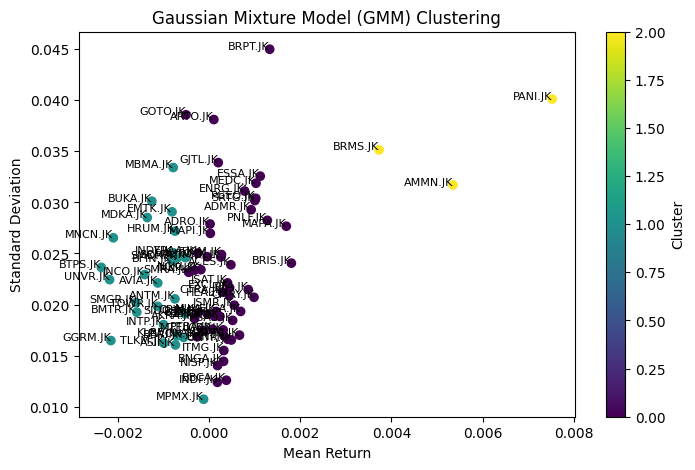

In [ ]:
import matplotlib.pyplot as plt

# Menambahkan label klaster pada DataFrame rasio Sharpe
best_gmm = best_gmm_result['best_gmm']
labels = best_gmm.predict(scaled_data)
sharpe_ratio['Cluster'] = labels

# Membuat grafik scatter plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    sharpe_ratio['mean_return'],
    sharpe_ratio['standard_deviation'],
    c=sharpe_ratio['Cluster'],
    cmap='viridis'
)

# Menambahkan judul dan label sumbu
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('Mean Return')
plt.ylabel('Standard Deviation')

# Menambahkan label nama saham
for i, ticker in enumerate(sharpe_ratio['ticker']):
    plt.text(
        sharpe_ratio['mean_return'][i],
        sharpe_ratio['standard_deviation'][i],
        ticker,
        fontsize=8,
        ha='right'
    )

# Menampilkan grafik
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
# Mendapatkan indeks dengan rasio Sharpe tertinggi di setiap klaster
max_sharpe_idx = sharpe_ratio.groupby('Cluster')['sharpe_ratio'].idxmax()

# Mengambil data saham dengan rasio Sharpe tertinggi di setiap klaster
result_with_highest_sharpe = sharpe_ratio.loc[max_sharpe_idx]

# Membuat daftar ticker dengan rasio Sharpe tertinggi
highest_gmm_tickers = result_with_highest_sharpe['ticker'].tolist()

# Menampilkan daftar ticker
print("Ticker dengan Rasio Sharpe Tertinggi di Setiap Klaster (GMM):")
print(highest_gmm_tickers)


Ticker dengan Rasio Sharpe Tertinggi di Setiap Klaster (GMM):
['BRIS.JK', 'MBMA.JK', 'PANI.JK']


In [ ]:
# Mendapatkan indeks dengan rasio Sharpe terendah di setiap klaster
min_sharpe_idx = sharpe_ratio.groupby('Cluster')['sharpe_ratio'].idxmin()

# Mengambil data saham dengan rasio Sharpe terendah di setiap klaster
result_with_lowest_sharpe = sharpe_ratio.loc[min_sharpe_idx]

# Membuat daftar ticker dengan rasio Sharpe terendah
lowest_gmm_tickers = result_with_lowest_sharpe['ticker'].tolist()

# Menampilkan daftar ticker
print("Ticker dengan Rasio Sharpe Terendah di Setiap Klaster (GMM):")
print(lowest_gmm_tickers)


Ticker dengan Rasio Sharpe Terendah di Setiap Klaster (GMM):
['AKRA.JK', 'GGRM.JK', 'BRMS.JK']


In [ ]:
# Mengelompokkan data berdasarkan klaster
grouped = sharpe_ratio.groupby('Cluster')

# Fungsi untuk mendapatkan baris dengan rasio Sharpe tengah
def get_middle_sharpe_row(group):
    sorted_group = group.sort_values(by='sharpe_ratio').reset_index(drop=True)
    middle_index = len(sorted_group) // 2
    return sorted_group.iloc[middle_index]

# Menerapkan fungsi pada setiap klaster
middle_sharpe_rows = grouped.apply(get_middle_sharpe_row)

# Membuat daftar ticker dengan rasio Sharpe tengah
middle_gmm_tickers = middle_sharpe_rows['ticker'].tolist()

# Menampilkan daftar ticker
print("Ticker dengan Rasio Sharpe Tengah di Setiap Klaster (GMM):")
print(middle_gmm_tickers)


Ticker dengan Rasio Sharpe Tengah di Setiap Klaster (GMM):
['AMRT.JK', 'KLBF.JK', 'AMMN.JK']


<ipython-input-30-423a16b54e9a>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  middle_sharpe_rows = grouped.apply(get_middle_sharpe_row)


#**4. Portfolio Optimization**

In [ ]:
# Menghitung matriks kovarians untuk ticker dengan rasio Sharpe tertinggi
high_sigma = return_df[highest_gmm_tickers].cov()

# Menghitung matriks kovarians untuk ticker dengan rasio Sharpe tengah
mid_sigma = return_df[middle_gmm_tickers].cov()

# Menghitung matriks kovarians untuk ticker dengan rasio Sharpe terendah
low_sigma = return_df[lowest_gmm_tickers].cov()

# Menampilkan hasil
print("Matriks Kovarians untuk Ticker dengan Rasio Sharpe Tertinggi:")
print(high_sigma)

print("\nMatriks Kovarians untuk Ticker dengan Rasio Sharpe Tengah:")
print(mid_sigma)

print("\nMatriks Kovarians untuk Ticker dengan Rasio Sharpe Terendah:")
print(low_sigma)


Matriks Kovarians untuk Ticker dengan Rasio Sharpe Tertinggi:
Ticker   BRIS.JK  MBMA.JK  PANI.JK
Ticker                            
BRIS.JK  0.00058  0.00014  0.00008
MBMA.JK  0.00014  0.00112  0.00013
PANI.JK  0.00008  0.00013  0.00161

Matriks Kovarians untuk Ticker dengan Rasio Sharpe Tengah:
Ticker   AMRT.JK  KLBF.JK  AMMN.JK
Ticker                            
AMRT.JK  0.00029  0.00004 -0.00000
KLBF.JK  0.00004  0.00029 -0.00003
AMMN.JK -0.00000 -0.00003  0.00101

Matriks Kovarians untuk Ticker dengan Rasio Sharpe Terendah:
Ticker   AKRA.JK  GGRM.JK  BRMS.JK
Ticker                            
AKRA.JK  0.00035  0.00001  0.00013
GGRM.JK  0.00001  0.00027  0.00003
BRMS.JK  0.00013  0.00003  0.00124


In [ ]:
# Menghitung rata-rata return untuk ticker dengan rasio Sharpe tertinggi
high_mean_return = return_df[highest_gmm_tickers].mean()

# Menghitung rata-rata return untuk ticker dengan rasio Sharpe tengah
mid_mean_return = return_df[middle_gmm_tickers].mean()

# Menghitung rata-rata return untuk ticker dengan rasio Sharpe terendah
low_mean_return = return_df[lowest_gmm_tickers].mean()

# Menampilkan hasil
print("Rata-rata Return untuk Ticker dengan Rasio Sharpe Tertinggi:")
print(high_mean_return)

print("\nRata-rata Return untuk Ticker dengan Rasio Sharpe Tengah:")
print(mid_mean_return)

print("\nRata-rata Return untuk Ticker dengan Rasio Sharpe Terendah:")
print(low_mean_return)


Rata-rata Return untuk Ticker dengan Rasio Sharpe Tertinggi:
Ticker
BRIS.JK    0.00181
MBMA.JK   -0.00078
PANI.JK    0.00752
dtype: float64

Rata-rata Return untuk Ticker dengan Rasio Sharpe Tengah:
Ticker
AMRT.JK    0.00033
KLBF.JK   -0.00069
AMMN.JK    0.00535
dtype: float64

Rata-rata Return untuk Ticker dengan Rasio Sharpe Terendah:
Ticker
AKRA.JK   -0.00031
GGRM.JK   -0.00215
BRMS.JK    0.00373
dtype: float64


##**A. Whale Optimization Algorithm**

###**1. High Sharpe Ratio**

In [ ]:
def high_gmm_optimal_weight(weight):
    # Fungsi untuk memastikan bobot berjumlah 1
    def weight_sum_constraint(w):
        return 1 - np.sum(w)

    # Penalti jika ada pelanggaran (nilai negatif)
    def violate_penalty(value):
        return 0 if value < 0 else value

    # Menghitung nilai objektif
    obj_func = np.dot(weight.T, np.dot(high_sigma, weight))

    # Menambahkan penalti untuk pelanggaran
    obj_func += violate_penalty(weight_sum_constraint(weight))

    # Normalisasi bobot untuk memastikan proporsi yang sesuai
    normalized_weights = weight / np.sum(weight)

    return obj_func


In [ ]:
from mealpy import FloatVar, WOA

# Mendefinisikan masalah optimasi untuk klaster High GMM
high_gmm_problem = {
    'obj_func': high_gmm_optimal_weight,  # Fungsi objektif yang sudah didefinisikan sebelumnya
    'bounds': FloatVar(lb=np.zeros(len(high_mean_return)), ub=np.ones(len(high_mean_return))),  # Batasan bobot [0, 1] untuk setiap saham
    'minmax': 'min'  # Menargetkan minimisasi fungsi objektif
}


In [ ]:
# Menyusun optimasi dengan WOA
optimizer_WOA = WOA.OriginalWOA(epoch=100, pop_size=100, pr=0.05)

# Memecahkan masalah optimasi menggunakan WOA
optimizer_WOA.solve(high_gmm_problem, seed=48)

INFO:mealpy.swarm_based.WOA.OriginalWOA:Solving single objective optimization problem.
<ipython-input-33-00fc8fbf0c80>:17: RuntimeWarning: invalid value encountered in divide
  normalized_weights = weight / np.sum(weight)
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 1, Current best: 0.0003995934087631839, Global best: 0.0003995934087631839, Runtime: 0.07675 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 2, Current best: 0.0003994974136489381, Global best: 0.0003994974136489381, Runtime: 0.08197 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 3, Current best: 0.00039865785085010594, Global best: 0.00039865785085010594, Runtime: 0.03765 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 4, Current best: 0.00039792029687965775, Global best: 0.00039792029687965775, Runtime: 0.08828 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 5, Current best: 0.000397673786276479, Global best: 0.000397

id: 20306, target: Objectives: [0.00039731], Fitness: 0.00039730540833787776, solution: [0.46446351 0.37175872 0.16377777]

In [ ]:
high_woa_gmm_optimal_weight = []
for i in range(len(high_mean_return)):
  high_woa_gmm_optimal_weight.append(
      {
          'weight' : optimizer_WOA.g_best.solution[i],
          }
      )
high_woa_gmm_optimal_weight = pd.DataFrame(high_woa_gmm_optimal_weight)
high_woa_gmm_optimal_weight['ticker'] = return_df[highest_gmm_tickers].columns
high_woa_gmm_optimal_weight.set_index('ticker', inplace = True)
high_woa_gmm_optimal_weight

,weight
ticker,
BRIS.JK,0.46446
MBMA.JK,0.37176
PANI.JK,0.16378


###**2. Mid Sharpe Ratio**

In [ ]:
def mid_gmm_optimal_weight(weight):
  def weight_sum(w):
    return 1 - np.sum(w)
  def violate(value):
    return 0 if value < 0 else value
  obj_func =  np.dot(weight.T, np.dot(mid_sigma, weight))

  obj_func += violate(weight_sum(weight))
  normalized_weights = weight / np.sum(weight)
  return obj_func

In [ ]:
from mealpy import FloatVar, WOA

mid_gmm_problem = {
    'obj_func' : mid_gmm_optimal_weight,
    'bounds' : FloatVar(lb = np.zeros(len(mid_mean_return)), ub = np.ones(len(mid_mean_return))),
    'minmax' : 'min'
}

optimizer_WOA = WOA.OriginalWOA(epoch = 100, pop_size = 100, pr = 0.05)
optimizer_WOA.solve(mid_gmm_problem, seed = 48)

INFO:mealpy.swarm_based.WOA.OriginalWOA:Solving single objective optimization problem.
<ipython-input-37-7391a41d4c43>:9: RuntimeWarning: invalid value encountered in divide
  normalized_weights = weight / np.sum(weight)
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 1, Current best: 0.00013682888277661152, Global best: 0.00013682888277661152, Runtime: 0.01580 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 2, Current best: 0.00013679979903805849, Global best: 0.00013679979903805849, Runtime: 0.01644 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 3, Current best: 0.00013651423372430848, Global best: 0.00013651423372430848, Runtime: 0.01624 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 4, Current best: 0.00013651048942673092, Global best: 0.00013651048942673092, Runtime: 0.02047 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 5, Current best: 0.00013645927178566617, Global best: 0.0

id: 40613, target: Objectives: [0.00013642], Fitness: 0.00013642227012213153, solution: [0.46954249 0.37594371 0.1545138 ]

In [ ]:
mid_woa_gmm_optimal_weight = []
for i in range(len(mid_mean_return)):
  mid_woa_gmm_optimal_weight.append(
      {
          'weight' : optimizer_WOA.g_best.solution[i],
          }
      )
mid_woa_gmm_optimal_weight = pd.DataFrame(mid_woa_gmm_optimal_weight)
mid_woa_gmm_optimal_weight['ticker'] = return_df[middle_gmm_tickers].columns
mid_woa_gmm_optimal_weight.set_index('ticker', inplace = True)
mid_woa_gmm_optimal_weight

,weight
ticker,
AMRT.JK,0.46954
KLBF.JK,0.37594
AMMN.JK,0.15451


###**3. Low Sharpe Ratio**

In [ ]:
def low_gmm_optimal_weight(weight):
  def weight_sum(w):
    return 1 - np.sum(w)
  def violate(value):
    return 0 if value < 0 else value
  obj_func =  np.dot(weight.T, np.dot(low_sigma, weight))

  obj_func += violate(weight_sum(weight))
  normalized_weights = weight / np.sum(weight)
  return obj_func

In [ ]:
from mealpy import FloatVar, WOA

low_gmm_problem = {
    'obj_func' : low_gmm_optimal_weight,
    'bounds' : FloatVar(lb = np.zeros(len(low_mean_return)), ub = np.ones(len(low_mean_return))),
    'minmax' : 'min'
}

optimizer_WOA = WOA.OriginalWOA(epoch = 100, pop_size = 100, pr = 0.03)
optimizer_WOA.solve(low_gmm_problem, seed = 450)

INFO:mealpy.swarm_based.WOA.OriginalWOA:Solving single objective optimization problem.
<ipython-input-40-aa419b4794ab>:9: RuntimeWarning: invalid value encountered in divide
  normalized_weights = weight / np.sum(weight)
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 1, Current best: 0.00018780739219551796, Global best: 0.00018780739219551796, Runtime: 0.01445 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 2, Current best: 0.00018294884613200932, Global best: 0.00018294884613200932, Runtime: 0.01996 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 3, Current best: 0.00017714748218988872, Global best: 0.00017714748218988872, Runtime: 0.01953 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 4, Current best: 0.00017448253470674034, Global best: 0.00017448253470674034, Runtime: 0.01738 seconds
INFO:mealpy.swarm_based.WOA.OriginalWOA:>>>Problem: P, Epoch: 5, Current best: 0.00017448253470674034, Global best: 0.0

id: 60920, target: Objectives: [0.0001742], Fitness: 0.0001741950733781656, solution: [0.23576882 0.57050511 0.19372607]

In [ ]:
low_woa_gmm_optimal_weight = []
for i in range(len(low_mean_return)):
  low_woa_gmm_optimal_weight.append(
      {
          'weight' : optimizer_WOA.g_best.solution[i],
          }
      )
low_woa_gmm_optimal_weight = pd.DataFrame(low_woa_gmm_optimal_weight)
low_woa_gmm_optimal_weight['ticker'] = return_df[lowest_gmm_tickers].columns
low_woa_gmm_optimal_weight.set_index('ticker', inplace = True)
low_woa_gmm_optimal_weight

,weight
ticker,
AKRA.JK,0.23577
GGRM.JK,0.57051
BRMS.JK,0.19373


##**B. Grey Wolf Optimization**

###**1. High Sharpe Ratio**

In [ ]:
from mealpy import FloatVar, GWO

optimizer_GWO = GWO.OriginalGWO(epoch = 100, pop_size = 100, pr = 0.05)
optimizer_GWO.solve(high_gmm_problem, seed = 24)

INFO:mealpy.swarm_based.GWO.OriginalGWO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 1, Current best: 0.0004375443151621962, Global best: 0.0004375443151621962, Runtime: 0.01933 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 2, Current best: 0.0003960495318942757, Global best: 0.0003960495318942757, Runtime: 0.01938 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 3, Current best: 0.00039120226297224673, Global best: 0.00039120226297224673, Runtime: 0.02406 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 4, Current best: 0.00039120226297224673, Global best: 0.00039120226297224673, Runtime: 0.02044 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 5, Current best: 0.00039052765228685056, Global best: 0.00039052765228685056, Runtime: 0.02124 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 6, Current best: 0.00039052765

id: 81827, target: Objectives: [0.00037666], Fitness: 0.00037666223910648883, solution: [0.56717989 0.24851112 0.18431964]

In [ ]:
high_gwo_gmm_optimal_weight = []
for i in range(len(low_mean_return)):
  high_gwo_gmm_optimal_weight.append(
      {
          'weight' : optimizer_GWO.g_best.solution[i],
          }
      )
high_gwo_gmm_optimal_weight = pd.DataFrame(high_gwo_gmm_optimal_weight)
high_gwo_gmm_optimal_weight['ticker'] = return_df[highest_gmm_tickers].columns
high_gwo_gmm_optimal_weight.set_index('ticker', inplace = True)
high_gwo_gmm_optimal_weight

,weight
ticker,
BRIS.JK,0.56718
MBMA.JK,0.24851
PANI.JK,0.18432


###**2. Mid Sharpe Ratio**

In [ ]:
from mealpy import FloatVar, GWO

optimizer_GWO = GWO.OriginalGWO(epoch = 100, pop_size = 100, pr = 0.05)
optimizer_GWO.solve(mid_gmm_problem, seed = 24)

INFO:mealpy.swarm_based.GWO.OriginalGWO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 1, Current best: 0.00014485516201692366, Global best: 0.00014485516201692366, Runtime: 0.01634 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 2, Current best: 0.00014485516201692366, Global best: 0.00014485516201692366, Runtime: 0.02011 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 3, Current best: 0.00014485516201692366, Global best: 0.00014485516201692366, Runtime: 0.01930 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 4, Current best: 0.00014485516201692366, Global best: 0.00014485516201692366, Runtime: 0.03372 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 5, Current best: 0.00014485516201692366, Global best: 0.00014485516201692366, Runtime: 0.02034 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 6, Current best: 0.0001394

id: 102734, target: Objectives: [0.00013477], Fitness: 0.00013477360207491917, solution: [0.41722517 0.43488611 0.14791782]

In [ ]:
mid_gwo_gmm_optimal_weight = []
for i in range(len(low_mean_return)):
  mid_gwo_gmm_optimal_weight.append(
      {
          'weight' : optimizer_GWO.g_best.solution[i],
          }
      )
mid_gwo_gmm_optimal_weight = pd.DataFrame(mid_gwo_gmm_optimal_weight)
mid_gwo_gmm_optimal_weight['ticker'] = return_df[middle_gmm_tickers].columns
mid_gwo_gmm_optimal_weight.set_index('ticker', inplace = True)
mid_gwo_gmm_optimal_weight

,weight
ticker,
AMRT.JK,0.41723
KLBF.JK,0.43489
AMMN.JK,0.14792


###**3. Low Sharpe Ratio**

In [ ]:
from mealpy import FloatVar, GWO

optimizer_GWO = GWO.OriginalGWO(epoch = 100, pop_size = 100, pr = 0.03)
optimizer_GWO.solve(low_gmm_problem, seed = 182)

INFO:mealpy.swarm_based.GWO.OriginalGWO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 1, Current best: 0.0001831950228468644, Global best: 0.0001831950228468644, Runtime: 0.01474 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 2, Current best: 0.00016435775172352502, Global best: 0.00016435775172352502, Runtime: 0.01768 seconds
<ipython-input-40-aa419b4794ab>:9: RuntimeWarning: invalid value encountered in divide
  normalized_weights = weight / np.sum(weight)
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 3, Current best: 0.00016281240045344555, Global best: 0.00016281240045344555, Runtime: 0.02222 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 4, Current best: 0.00015665905268774348, Global best: 0.00015665905268774348, Runtime: 0.01927 seconds
INFO:mealpy.swarm_based.GWO.OriginalGWO:>>>Problem: P, Epoch: 5, Current best: 0.00015583814018005715, Global best: 0.000

id: 123641, target: Objectives: [0.00015037], Fitness: 0.00015036503138049815, solution: [0.3950955  0.53700139 0.06796563]

In [ ]:
low_gwo_gmm_optimal_weight = []
for i in range(len(low_mean_return)):
  low_gwo_gmm_optimal_weight.append(
      {
          'weight' : optimizer_GWO.g_best.solution[i],
          }
      )
low_gwo_gmm_optimal_weight = pd.DataFrame(low_gwo_gmm_optimal_weight)
low_gwo_gmm_optimal_weight['ticker'] = return_df[lowest_gmm_tickers].columns
low_gwo_gmm_optimal_weight.set_index('ticker', inplace = True)
low_gwo_gmm_optimal_weight

,weight
ticker,
AKRA.JK,0.39510
GGRM.JK,0.53700
BRMS.JK,0.06797


##**C. Mean Variance**

In [ ]:
def mean_variance_weight(return_df):
  sigma = return_df.cov()
  mean_return = return_df.mean()
  satu = np.full((len(sigma), 1), 1)

  pembilang = np.linalg.inv(sigma)@satu
  penyebut = satu.T@np.linalg.inv(sigma)@satu

  optimal_weight = pd.DataFrame(pembilang/penyebut, columns=['weight'])
  optimal_weight['ticker'] = return_df.columns
  optimal_weight = optimal_weight.set_index('ticker')

  return optimal_weight

###**1. High Sharpe Ratio**

In [ ]:
high_gmm_optimal_weight = mean_variance_weight(return_df[highest_gmm_tickers])
high_gmm_optimal_weight

,weight
ticker,
BRIS.JK,0.56700
MBMA.JK,0.24607
PANI.JK,0.18693


###**2. Mid Sharpe Ratio**

In [ ]:
mid_gmm_optimal_weight = mean_variance_weight(return_df[middle_gmm_tickers])
mid_gmm_optimal_weight

,weight
ticker,
AMRT.JK,0.41548
KLBF.JK,0.43501
AMMN.JK,0.14951


###**3. Low Sharpe Ratio**

In [ ]:
low_gmm_optimal_weight = mean_variance_weight(return_df[lowest_gmm_tickers])
low_gmm_optimal_weight

,weight
ticker,
AKRA.JK,0.39669
GGRM.JK,0.53589
BRMS.JK,0.06742


#**5. Portfolio Performance**

In [ ]:
def portfolio_sharpe_ratio(start_date, end_date, weights, rf = 0.06):
  return_df_portfolio = yf.download(weights.index.values.tolist(), start=start_date, end=end_date)['Close'].pct_change().dropna()
  sigma = return_df_portfolio.cov()
  var_rp = np.dot(weights.T, np.dot(sigma, weights))
  e_rp = np.dot(np.transpose(weights), return_df_portfolio.mean())
  E_rp = ((1+e_rp)**30)-1

  std_rp = np.sqrt(var_rp)*np.sqrt(30)
  sharpe_ratio = (E_rp - rf)/std_rp

  result_df = pd.DataFrame({
      'Expected Portfolio Return': [E_rp][0][0],
      'Portfolio Standard Deviation': [std_rp][0][0],
      'Sharpe Ratio': [sharpe_ratio][0][0]})
  return result_df

In [ ]:
import pandas as pd

# Misalkan `high_gmm_optimal_weight` dan lainnya sudah berupa pd.Series atau pd.DataFrame
# jika belum, Anda perlu memastikan ini sesuai formatnya
all_weights_gmm = [
    high_gmm_optimal_weight, mid_gmm_optimal_weight, low_gmm_optimal_weight,
    high_gwo_gmm_optimal_weight, mid_gwo_gmm_optimal_weight, low_gwo_gmm_optimal_weight,
    high_woa_gmm_optimal_weight, mid_woa_gmm_optimal_weight, low_woa_gmm_optimal_weight,
]

# Label untuk masing-masing metode
method_labels = ['High GMM', 'Mid GMM', 'Low GMM',
                 'High GWO GMM', 'Mid GWO GMM', 'Low GWO GMM',
                 'High WOA GMM', 'Mid WOA GMM', 'Low WOA GMM',]

# Menyusun daftar tanggal rentang
date_ranges = [
    ('2022-12-01', '2023-08-31'),  # Periode 1
    ('2023-09-01', '2024-04-30'),  # Periode 2
    ('2024-05-01', '2024-12-01')   # Periode 3
]


# Tempat untuk menyimpan hasil
all_results = []

# Pastikan `weights` adalah pd.Series atau pd.DataFrame sebelum diteruskan ke fungsi
for start_date, end_date in date_ranges:
    results = []
    for weights, method in zip(all_weights_gmm, method_labels):
        # Periksa apakah weights adalah pd.Series atau pd.DataFrame
        if isinstance(weights, (pd.Series, pd.DataFrame)):
            result_df = portfolio_sharpe_ratio(start_date, end_date, weights)
            result_df['Method'] = method
            results.append(result_df)
        else:
            print(f"Warning: weights for {method} is not a valid Series or DataFrame.")
    performance_df = pd.concat(results).reset_index(drop=True)
    performance_df['Date Range'] = f'{start_date} - {end_date}'
    all_results.append(performance_df)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%********

In [ ]:
# Cek apakah ada data yang hilang
print(return_df.isna().sum())


Ticker
ACES.JK    0
ADMR.JK    0
ADRO.JK    0
AKRA.JK    0
AMMN.JK    0
          ..
TKIM.JK    0
TLKM.JK    0
TOWR.JK    0
UNTR.JK    0
UNVR.JK    0
Length: 80, dtype: int64


In [ ]:
pd.options.display.float_format = '{:.3f}'.format

final_performance = pd.concat(all_results).reset_index(drop=True)
final_performance = pd.DataFrame(final_performance)
final_performance = final_performance[['Date Range', 'Method', 'Sharpe Ratio']]
final_performance = final_performance.pivot(index = 'Method', columns = 'Date Range', values = 'Sharpe Ratio')
final_performance['Mean'] = final_performance.mean(axis=1)
final_performance['std. Dev'] = final_performance.std(axis=1)
final_performance

Date Range,2022-12-01 - 2023-08-31,2023-09-01 - 2024-04-30,2024-05-01 - 2024-12-01,Mean,std. Dev
Method,,,,,
High GMM,0.186,-0.083,0.144,0.082,0.118
High GWO GMM,0.171,-0.086,0.137,0.074,0.114
High WOA GMM,0.026,-0.241,0.052,-0.054,0.133
Low GMM,-0.296,-0.822,0.324,-0.265,0.468
Low GWO GMM,-0.295,-0.822,0.326,-0.264,0.469
Low WOA GMM,-0.223,-0.947,0.391,-0.260,0.547
Mid GMM,5.285,0.007,-0.685,1.536,2.666
Mid GWO GMM,5.299,0.011,-0.684,1.542,2.671
Mid WOA GMM,5.490,0.097,-0.649,1.646,2.735


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data yang diberikan
data = {
    'Date Range': ['2022-12-01 - 2023-08-31', '2023-09-01 - 2024-04-30', '2024-05-01 - 2024-12-01'],
    'High GMM': [0.186, -0.083, 0.144],
    'High GWO GMM': [0.171, -0.086, 0.137],
    'High WOA GMM': [0.026, -0.241, 0.052],
    'Low GMM': [-0.296, -0.822, 0.324],
    'Low GWO GMM': [-0.295, -0.822, 0.326],
    'Low WOA GMM': [-0.223, -0.947, 0.391],
    'Mid GMM': [5.285, 0.007, -0.685],
    'Mid GWO GMM': [5.299, 0.011, -0.684],
    'Mid WOA GMM': [5.490, 0.097, -0.649]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Menghitung mean dan std dev dari setiap metode
df_mean = df.drop('Date Range', axis=1).mean(axis=0)
df_std = df.drop('Date Range', axis=1).std(axis=0)

# Menambahkan rata-rata dan deviasi standar ke DataFrame
df['Mean'] = df.drop('Date Range', axis=1).mean(axis=1)
df['std. Dev'] = df.drop('Date Range', axis=1).std(axis=1)


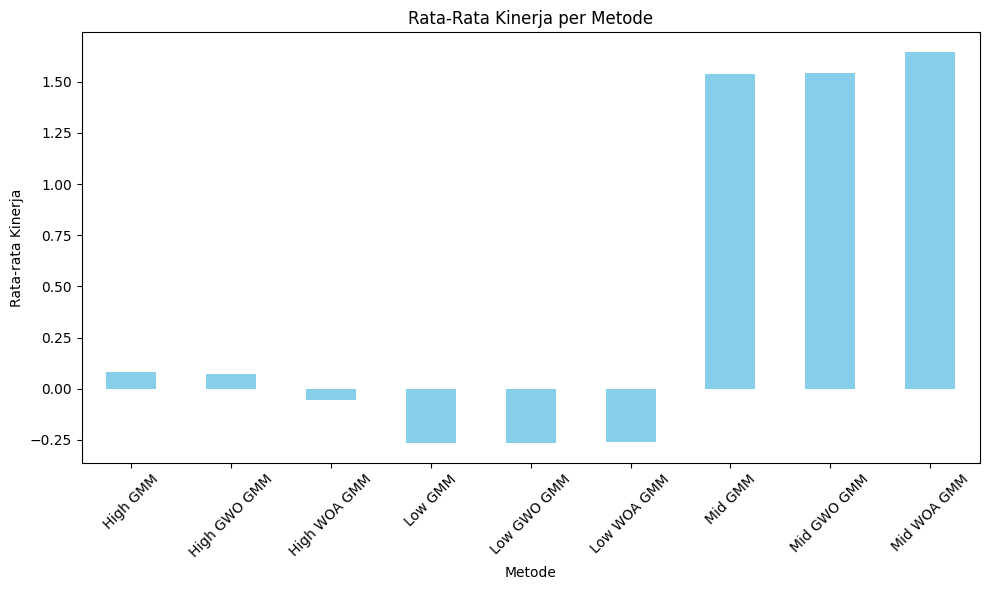

In [ ]:
plt.figure(figsize=(10, 6))
df_mean.plot(kind='bar', color='skyblue')
plt.title('Rata-Rata Kinerja per Metode')
plt.xlabel('Metode')
plt.ylabel('Rata-rata Kinerja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


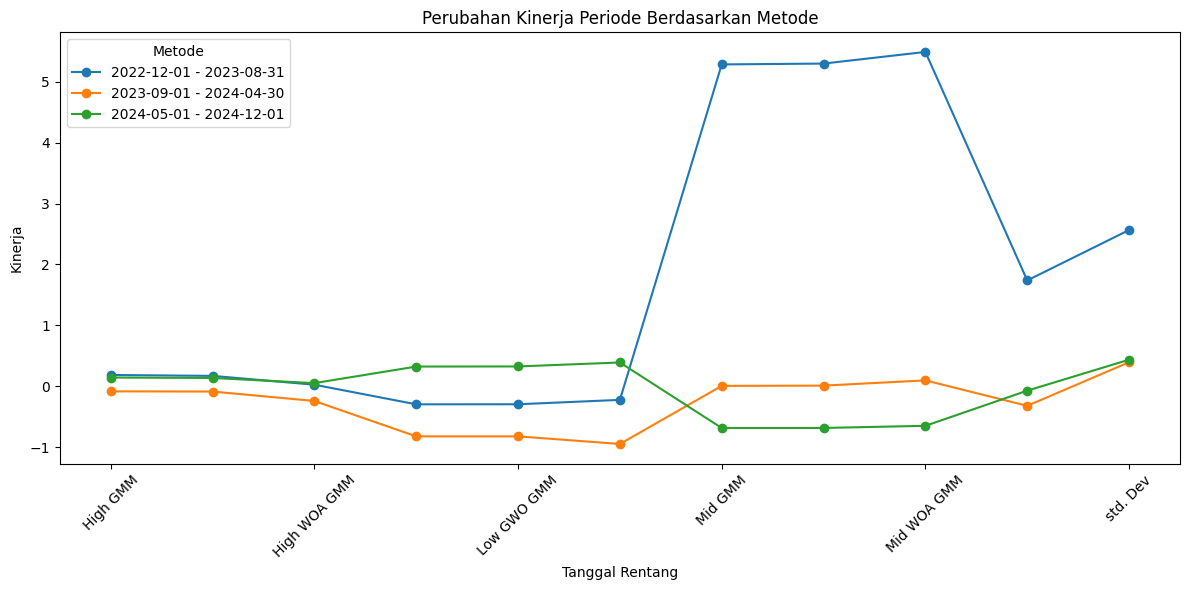

In [ ]:
df.set_index('Date Range').T.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Perubahan Kinerja Periode Berdasarkan Metode')
plt.xlabel('Tanggal Rentang')
plt.ylabel('Kinerja')
plt.legend(title='Metode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Data hasil perhitungan untuk setiap metode dan rentang tanggal
data = {
    'Method': ['High GMM', 'Mid GMM', 'Low GMM', 'High GWO GMM', 'Mid GWO GMM', 'Low GWO GMM',
               'High WOA GMM', 'Mid WOA GMM', 'Low WOA GMM'],
    '2022-12-01 - 2023-08-31': [0.186, 5.285, -0.296, 0.171, 5.299, -0.295, 0.026, 5.490, -0.223],
    '2023-09-01 - 2024-04-30': [-0.083, 0.007, -0.822, -0.086, 0.011, -0.822, -0.241, 0.097, -0.947],
    '2024-05-01 - 2024-12-01': [0.144, -0.685, 0.324, 0.137, -0.684, 0.326, 0.052, -0.649, 0.391],
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung rata-rata dan deviasi standar untuk setiap metode
df['Mean'] = df.iloc[:, 1:].mean(axis=1)
df['Std. Dev'] = df.iloc[:, 1:].std(axis=1)

# Fungsi untuk menghitung Sharpe Ratio
# Asumsi: risk-free rate = 0, Sharpe Ratio = mean / std dev
df['Sharpe Ratio'] = df['Mean'] / df['Std. Dev']

# Menampilkan hasil
df = df[['Method', 'Mean', 'Std. Dev', 'Sharpe Ratio']]
df


,Method,Mean,Std. Dev,Sharpe Ratio
0,High GMM,0.082,0.118,0.697
1,Mid GMM,1.536,2.666,0.576
2,Low GMM,-0.265,0.468,-0.565
3,High GWO GMM,0.074,0.114,0.649
4,Mid GWO GMM,1.542,2.672,0.577
5,Low GWO GMM,-0.264,0.469,-0.562
6,High WOA GMM,-0.054,0.132,-0.410
7,Mid WOA GMM,1.646,2.735,0.602
8,Low WOA GMM,-0.260,0.547,-0.475


In [ ]:
import pandas as pd

# Data hasil perhitungan untuk setiap metode dan rentang waktu
data = {
    'Method': ['High GMM', 'Mid GMM', 'Low GMM',
               'High GWO GMM', 'Mid GWO GMM', 'Low GWO GMM',
               'High WOA GMM', 'Mid WOA GMM', 'Low WOA GMM'],
    'Mean': [0.082, 1.536, -0.265,
             0.074, 1.542, -0.264,
             -0.054, 1.646, -0.260],
    'Std. Dev': [0.118, 2.666, 0.468,
                 0.114, 2.672, 0.469,
                 0.132, 2.735, 0.547],
    'Sharpe Ratio': [0.697, 0.576, -0.565,
                     0.649, 0.577, -0.562,
                     -0.410, 0.602, -0.475]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Mengelompokkan berdasarkan metode (GMM, GWO, WOA) dan menghitung rata-rata, deviasi standar, dan Sharpe Ratio
summary = df.groupby(df['Method'].str.extract('(GMM|GWO|WOA)')[0]).agg(
    {'Mean': 'mean', 'Std. Dev': 'mean', 'Sharpe Ratio': 'mean'}).reset_index()

# Menampilkan hasil
summary


,0,Mean,Std. Dev,Sharpe Ratio
0,GMM,0.451,1.084,0.236
1,GWO,0.451,1.085,0.221
2,WOA,0.444,1.138,-0.094
